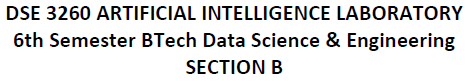

## Kartabya Krishna
## RegNo: 210968244
## Week: 3
## Date: 20240122

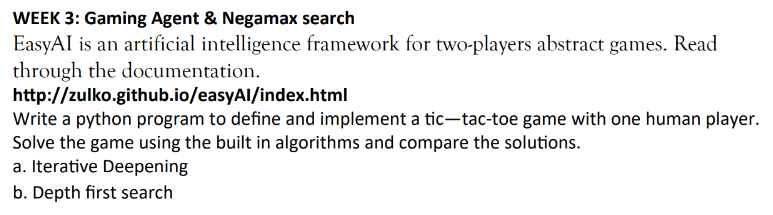

Next, we import the required classes and functions:
- `TwoPlayerGame`: class in the EasyAI library that provides a basic framework for creating two-player games.
- `Human_Player`: class in the EasyAI library that represents a human player. It prompts the user to enter moves from the console
- `AI_Player`: class in the EasyAI library that represents an AI player. It takes a game instance and a search algorithm as input, and uses the algorithm to select the best move
- `solve_with_iterative_deepening`: function in the EasyAI library that uses iterative deepening search to find the best move for a given game instance and AI player. It takes as input a game instance, an AI player, and a maximum search depth, and returns the best move.
- `solve_with_depth_first_search`: function in the EasyAI library that uses depth-first search to find the best move for a given game instance and AI player. It takes as input a game instance, an AI player, and a maximum search depth, and returns the best move.
- `Negamax`: class in the EasyAI library that implements the Negamax algorithm for game-playing AI. It takes as input a game instance and a maximum search depth, and returns the best move.

In [1]:
# importing the required classes and functions
from easyAI import TwoPlayerGame, Human_Player, AI_Player, solve_with_iterative_deepening, solve_with_depth_first_search
from easyAI.AI import Negamax

Next, we declare the specifications of the game by making a class TicTacToe and defining the following functions:
- `__ init __`: initializes the TicTacToe game with a board of the specified size (default is 3x3). It also sets up the players and their marks (X or O).
- `possible_moves`:  returns a list of all possible moves that can be made on the current board state. Each move is represented as a tuple of (x, y) coordinates.
- `make_move`: makes the specified move on the board for the specified player (X or O).
- `unmake_move`: function undoes the specified move on the board. (used only by AI)
- `lose`: specifies if the current user has lost or not by checking for all possible configurations on the board
- `is_over`: returns True if the game is over (either because someone has won or the game is a draw), or False otherwise.
- `show`: prints the current state of the board to the console.
- `scoring`: calculates and returns the score of the current board state, based on the current player. The score is a value between -100 (loss) and 100 (win).

In [2]:
# declaring the specifications of the game
class TicTacToe(TwoPlayerGame):
    """The board positions are numbered as follows:
    1 2 3
    4 5 6
    7 8 9
    """

    def __init__(self, players=None):
        self.players = players
        self.board = [0 for i in range(9)]
        self.current_player = 1

    def possible_moves(self):
        return [i + 1 for i, e in enumerate(self.board) if e == 0]

    def make_move(self, move):
        self.board[int(move) - 1] = self.current_player

    def unmake_move(self, move):  # optional method (speeds up the AI)
        self.board[int(move) - 1] = 0

    def lose(self):
        """ Has the opponent "three in line ?" """
        return any(
            [
                all([(self.board[c - 1] == self.opponent_index) for c in line])
                for line in [
                    [1, 2, 3],
                    [4, 5, 6],
                    [7, 8, 9],  # horiz.
                    [1, 4, 7],
                    [2, 5, 8],
                    [3, 6, 9],  # vertical
                    [1, 5, 9],
                    [3, 5, 7],
                ]
            ]
        )  # diagonal

    def is_over(self):
        return (self.possible_moves() == []) or self.lose()

    def show(self):
        print(
            "\n"
            + "\n".join(
                [
                    " ".join([[".", "O", "X"][self.board[3 * j + i]] for i in range(3)])
                    for j in range(3)
                ]
            )
        )

    def scoring(self):
        return -100 if self.lose() else 0

The main function defined solves the game as per the algorithm specified:
-  Iterative Deepening: it explores the game by using several times the Negamax algorithm, always starting at the initial state of the game, but taking increasing depth (in the list ai_depths) until the score of the initial condition indicates that the first player will certainly win or loose, at which case it stops,
- Depth First Search: solves a game using a depth-first search (therefore it cannot be used for games that can have an infinite number of moves). The game is explored until endgames are reached and these endgames are evaluated to see if their are victories or defeats (or draws). Then, a situation in which every move leads to a defeat is labelled as a (certain) defeat, and a situation in which one move leads to a (certain) defeat of the opponent is labelled as a (certain) victory. This way we come back up to the root (initial condition) which receives a label, which is returned.
- In negamax, the player whose turn it is to move assigns a value to each possible move based on the outcome of the game assuming optimal play by both players. This is done by recursively exploring the game tree, generating all possible moves and evaluating the resulting positions. The value assigned to each move is the negative of the value assigned by the opponent for their best move, hence the name "negamax". By negating the opponent's score, the algorithm takes into account the fact that the opponent is trying to minimize the player's score. The algorithm continues to explore the game tree until it reaches a terminal state, at which point it assigns a score to the position based on whether the player won, lost, or drew the game. The move with the highest score is then chosen as the best move.

We use the Negamax algorithm to create a brain for the agent. This way, it can think of all possible solutions upto 9 levels deep and play the move accordingly to maximize its score.

We then solve the games using Iterative Deepening and Depth First Search. Solving gives us a glimpse of what could be the potential outcome of a game, how many moves would the game last, and what would be the optimal first move by the first player.

In [3]:
# solving the game using specified searching approaches
def main(algo):
  ai = Negamax(9)
  if algo == 'id':
      result = solve_with_iterative_deepening(game=TicTacToe(players=[AI_Player(ai), Human_Player()]), ai_depths=range(2, 10), win_score=100)
  elif algo == 'dfs':
      result = solve_with_depth_first_search(game=TicTacToe(players=[AI_Player(ai), Human_Player()]), win_score=100)
  else:
      print("Invalid algorithm.")
  return result

Analyzing solution provided by Iterative Deepening.

In [4]:
import time
start = time.time()
idres = main('id')
end = time.time()
print('Result: ', idres)
print(str.format('Time Taken: {:.2f}s', end-start))

d:2, a:0, m:1
d:3, a:0, m:1
d:4, a:0, m:1
d:5, a:0, m:1
d:6, a:0, m:1
d:7, a:0, m:1
d:8, a:0, m:1
d:9, a:0, m:1
Result:  (0, 9, 1)
Time Taken: 0.68s


As we can see, there is a possibility of a draw (0), the game would end in 9 moves (5 by first player and 4 by the second), and the optimal first move is 1.

Analyzing solution provided by Depth First Search.

In [5]:
import time
start = time.time()
dfsres = main('dfs')
end = time.time()
print('Result: ', dfsres)
print(str.format('Time Taken: {:.2f}s', end-start))

Result:  0
Time Taken: 1.38s


As we can see, this searching technique provides only limited information - that there is a possibility of a draw.

Comparison: The time taken is significantly more for DFS in comparison to Iterative Deepening.

Some theoretical differences between the two:
- Search strategy: Depth-First Search (DFS) is a depth-first search strategy, meaning that it explores as far as possible along each branch before backtracking. Iterative Deepening (ID) is a hybrid search strategy that combines the depth-first search strategy of DFS with the breadth-first search strategy of Breadth-First Search (BFS).

- Memory usage: DFS can use a lot of memory, as it stores all visited nodes on the stack. This can lead to stack overflow errors if the search space is too large. ID, on the other hand, only stores the current path being explored, which greatly reduces memory usage.

- Completeness: DFS is not guaranteed to find a solution if one exists, especially if the search space is infinite or the solution is at the bottom of a deep branch. ID, however, is complete and will always find a solution if one exists, as it gradually increases the depth of the search until a solution is found.

- Time complexity: DFS has a time complexity of O(b^m), where b is the branching factor and m is the maximum depth of the search tree. ID has a time complexity of O(b^d), where d is the depth of the shallowest solution.

Let's have some fun now - let's break down and analyze how the AI agent is thinking, and not do that :D. In the sense, let's play sub-optimal moves and see how the agent strives to win.

In [6]:
# initializing the game
game = TicTacToe(players=[AI_Player(Negamax(9)), Human_Player()])

In [7]:
game.get_move()

1

In [8]:
game.play_move(2)
game.show()


. O .
. . .
. . .


In [ ]:
# now, let us play what the AI model intended to do
game.get_move()

In [137]:
game.play_move(1)
game.show()



X O .

. . .

. . .


In [138]:
game.get_move()

4

In [139]:
game.play_move(3)
game.show()



X O O

. . .

. . .


In [140]:
game.get_move()



Player 2 what do you play ? 4


4

In [141]:
game.play_move(4)
game.show()



X O O

X . .

. . .


In [142]:
game.get_move()

7

In [143]:
game.play_move(7)
game.show()



X O O

X . .

O . .


In [144]:
game.get_move()



Player 2 what do you play ? 5


5

In [145]:
game.play_move(5)
game.show()



X O O

X X .

O . .


In [146]:
game.get_move()

6

In [147]:
game.play_move(6)
game.show()



X O O

X X O

O . .


In [148]:
game.get_move()



Player 2 what do you play ? 9


9

In [149]:
game.play_move(9)
game.show()



X O O

X X O

O . X
